<a href="https://colab.research.google.com/github/santhanreddy864/In-class-exercise-1/blob/main/In_class_exercise_07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **The seventh in-class-exercise (20 points in total, 10/21/2020)**

Question description: In the last in-class-exercise (exercise-06), you collected the titles of 100 articles about data science, natural language processing, and machine learning. The 100 article titles will be used as the text corpus of this exercise. Perform the following tasks:

**Downloading Stopwords and spacy module**

In [1]:
import nltk
nltk.download('stopwords')
import spacy.cli
spacy.cli.download("en")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')
✔ Linking successful
/usr/local/lib/python3.7/dist-packages/en_core_web_sm -->
/usr/local/lib/python3.7/dist-packages/spacy/data/en
You can now load the model via spacy.load('en')


**Using Java**

In [2]:
import os
def java():
  !apt-get install -y openjdk-8-jdk-headless -qq > /dev/null
  os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
  !java -version
java()

openjdk version "11.0.10" 2021-01-19
OpenJDK Runtime Environment (build 11.0.10+9-Ubuntu-0ubuntu1.18.04)
OpenJDK 64-Bit Server VM (build 11.0.10+9-Ubuntu-0ubuntu1.18.04, mixed mode, sharing)


In [3]:
import nltk
nltk.download()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> all
       | 
       | Downloading package abc to /root/nltk_data...
       |   Unzipping corpora/abc.zip.
       | Downloading package alpino to /root/nltk_data...
       |   Unzipping corpora/alpino.zip.
       | Downloading package biocreative_ppi to /root/nltk_data...
       |   Unzipping corpora/biocreative_ppi.zip.
       | Downloading package brown to /root/nltk_data...
       |   Unzipping corpora/brown.zip.
       | Downloading package brown_tei to /root/nltk_data...
       |   Unzipping corpora/brown_tei.zip.
       | Downloading package cess_cat to /root/nltk_data...
       |   Unzipping corpora/cess_cat.zip.
       | Downloading package cess_esp to /root/nltk_data...
 

True

## (1) (8 points) Generate K topics by using LDA, the number of topics K should be decided by the coherence score, then summarize what are the topics. You may refer the code here: 

https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/

**Installing gensim and pyLDAvis**

In [4]:
!pip install gensim
!pip install pyLDAvis

     |████████████████████████████████| 1.7MB 8.8MB/s 
  Created wheel for pyLDAvis: filename=pyLDAvis-3.2.2-py2.py3-none-any.whl size=135593 sha256=31db73f650be185213004918c9638b03ccfa3735e655bc8f755ff966a5da7981
  Stored in directory: /root/.cache/pip/wheels/74/df/b6/97234c8446a43be05c9a8687ee0db1f1b5ade5f27729187eae
Successfully built pyLDAvis


In [5]:
!pip install --upgrade gensim

     |████████████████████████████████| 24.2MB 1.8MB/s 
  Found existing installation: gensim 3.6.0
    Uninstalling gensim-3.6.0:
      Successfully uninstalled gensim-3.6.0


**Extracting modules and using Stopwords**

In [6]:
import re
import numpy as np
import pandas as pd
import spacy
import pyLDAvis
import pyLDAvis.gensim
import matplotlib.pyplot as plt
%matplotlib inline
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
from pprint import pprint
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)
import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable
/usr/local/lib/python3.7/dist-packages/past/builtins/misc.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Mapping
/usr/local/lib/python3.7/dist-packages/scipy/sparse/sparsetools.py:21: DeprecationWarning: `scipy.sparse.sparsetools` is deprecated!
scipy.sparse.sparsetools is a private module for scipy.sparse, and should not be used.
  _deprecated()


**Using Inclass-exercise6 google artciles csv to dataframe**

In [7]:
import pandas as pd
import spacy
from spacy.matcher import Matcher
articles = pd.read_csv('/content/100datasciencesamples.csv', encoding = "ISO-8859-1")
articles.head(100)

,Heading for articles
0,Data science and prediction
1,Data science and its relationship to big data ...
2,Data Science for Business: What you need to kn...
3,High-dimensional probability: An introduction ...
4,Computational optimal transport: With applicat...
...,...
95,Qualitative research methods for science educa...
96,Highlights from TIMSS 2007: Mathematics and Sc...
97,How big is a chunk?: By combining data from se...
98,Power and trust: Critical factors in the adopt...


**Setting into a list with puncuation & tokenization**

In [8]:
data = articles['Heading for articles'].tolist()
words = []
for x in data:
  words.append(gensim.utils.simple_preprocess(str(x), deacc=True))

**Using Bigrams and Stopwords**

In [9]:
bigram = gensim.models.Phrases(words, min_count=5, threshold=100)
trigram = gensim.models.Phrases(bigram[words], threshold=100)
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)
after_stopword_removal = [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in words]
bigrams = [bigram_mod[doc] for doc in after_stopword_removal]
print(trigram_mod[bigram_mod[words[0]]])

['data', 'science', 'and', 'prediction']


**Lemmatization & building dictionary and frequency of terms in these document**

In [10]:
nlp = spacy.load('en', disable=['parser', 'ner'])
allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']
after_lemmatization = []
for sent in bigrams:
  doc = nlp(" ".join(sent)) 
  after_lemmatization.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
id2word = corpora.Dictionary(after_lemmatization)
texts = after_lemmatization
corpus = [id2word.doc2bow(text) for text in after_lemmatization]
print(corpus[:1])
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]]

[[(0, 1), (1, 1), (2, 1)]]


[[('datum', 1), ('prediction', 1), ('science', 1)]]

**LDA model Perplexity and Coherence Score**

In [11]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=20, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]
print('\nPerplexity: ', lda_model.log_perplexity(corpus)) 
coherence_model_lda = CoherenceModel(model=lda_model, texts=after_lemmatization, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)

[(0,
  '0.044*"climate" + 0.023*"change" + 0.023*"projection" + 0.023*"report" + '
  '0.023*"technology" + 0.023*"reconstruction" + 0.023*"public" + '
  '0.023*"integrative" + 0.023*"person" + 0.003*"science"'),
 (1,
  '0.023*"structure" + 0.023*"model" + 0.023*"multilevel" + 0.023*"data" + '
  '0.023*"molecular" + 0.023*"material" + 0.023*"machine" + 0.023*"learn" + '
  '0.023*"foundation" + 0.023*"computer"'),
 (2,
  '0.076*"analysis" + 0.037*"datum" + 0.032*"citizen" + 0.017*"envelopment" + '
  '0.017*"estimate" + 0.017*"inefficiency" + 0.017*"model" + 0.017*"scale" + '
  '0.017*"data" + 0.017*"technical"'),
 (3,
  '0.021*"show" + 0.021*"datum" + 0.021*"climate" + 0.021*"abrupt" + '
  '0.021*"core" + 0.021*"happen" + 0.021*"high" + 0.021*"change" + '
  '0.021*"year" + 0.021*"good"'),
 (4,
  '0.046*"datum" + 0.017*"technique" + 0.017*"summarize" + '
  '0.017*"multivariate" + 0.017*"cluster" + 0.017*"enable" + '
  '0.017*"monitoring" + 0.017*"open" + 0.017*"promise" + 0.017*"free"'),


**visualization**

In [12]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
10     0.498520  0.001172       1        1  17.350292
6     -0.008370 -0.119161       2        1   8.313276
13    -0.032163 -0.070891       3        1   7.289572
11    -0.029575  0.031462       4        1   6.924832
17    -0.032921  0.023467       5        1   5.741617
4     -0.026939 -0.001961       6        1   5.077921
12    -0.025103 -0.037305       7        1   5.064031
2     -0.032200  0.038976       8        1   4.908848
16    -0.030898  0.009375       9        1   4.387255
7     -0.030937 -0.012092      10        1   4.357308
19    -0.027961 -0.004266      11        1   4.351413
8     -0.034142 -0.031368      12        1   3.959768
5     -0.030873 -0.004665      13        1   3.868189
9     -0.006158  0.052454      14        1   3.474438
18    -0.027250 -0.014314      15        1   3.118619
3     -0.026770  0.017249      16        1   3.006192
14    -0.026934  0.024781      17        1   2.862591
15    -0.024397  0.035546      18        1   2.060886
0     -0.021488  0.030928      19        1   1.965221
1     -0.023439  0.030611      20        1   1.917732, topic_info=              Term      Freq      Total Category  logprob  loglift
2          science  34.00000  34.000000  Default  30.0000  30.0000
293  international  26.00000  26.000000  Default  29.0000  29.0000
310         result  25.00000  25.000000  Default  28.0000  28.0000
0            datum  19.00000  19.000000  Default  27.0000  27.0000
42        analysis   3.00000   3.000000  Default  26.0000  26.0000
..             ...       ...        ...      ...      ...      ...
15     dimensional   0.02596   1.276651  Topic20  -5.9738   0.0586
16            high   0.02596   1.573202  Topic20  -5.9738  -0.1503
17    introduction   0.02596   2.244454  Topic20  -5.9738  -0.5056
18     probability   0.02596   1.620026  Topic20  -5.9738  -0.1796
19       transport   0.02596   1.133505  Topic20  -5.9738   0.1775

[835 rows x 6 columns], token_table=      Topic      Freq           Term
term                                
278       4  0.754660         action
304       2  0.737965       adoption
37        2  0.415678      algorithm
42        5  0.274124       analysis
42        8  0.548248       analysis
...     ...       ...            ...
303       3  0.752635           unit
227       4  0.754658        veteran
110       4  0.754658  visualization
251       2  0.536434           work
189       2  0.536435       workflow

[128 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[11, 7, 14, 12, 18, 5, 13, 3, 17, 8, 20, 9, 6, 10, 19, 4, 15, 16, 1, 2])

In [13]:
import os       
def install_java():
  !apt-get install -y openjdk-8-jdk-headless -qq > /dev/null      
  os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"     
  !java -version       
install_java()

openjdk version "11.0.10" 2021-01-19
OpenJDK Runtime Environment (build 11.0.10+9-Ubuntu-0ubuntu1.18.04)
OpenJDK 64-Bit Server VM (build 11.0.10+9-Ubuntu-0ubuntu1.18.04, mixed mode, sharing)


In [14]:
!wget http://mallet.cs.umass.edu/dist/mallet-2.0.8.zip
!unzip mallet-2.0.8.zip

--2021-03-20 03:31:20--  http://mallet.cs.umass.edu/dist/mallet-2.0.8.zip
Resolving mallet.cs.umass.edu (mallet.cs.umass.edu)... 128.119.246.70
Connecting to mallet.cs.umass.edu (mallet.cs.umass.edu)|128.119.246.70|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16184794 (15M) [application/zip]
Saving to: ‘mallet-2.0.8.zip’

mallet-2.0.8.zip    100%[===================>]  15.43M  12.8MB/s    in 1.2s    

2021-03-20 03:31:21 (12.8 MB/s) - ‘mallet-2.0.8.zip’ saved [16184794/16184794]

Archive:  mallet-2.0.8.zip
   creating: mallet-2.0.8/
   creating: mallet-2.0.8/bin/
  inflating: mallet-2.0.8/bin/classifier2info  
  inflating: mallet-2.0.8/bin/csv2classify  
  inflating: mallet-2.0.8/bin/csv2vectors  
  inflating: mallet-2.0.8/bin/mallet  
  inflating: mallet-2.0.8/bin/mallet.bat  
  inflating: mallet-2.0.8/bin/mallethon  
  inflating: mallet-2.0.8/bin/prepend-license.sh  
  inflating: mallet-2.0.8/bin/svmlight2vectors  
  inflating: mallet-2.0.8/bin/text2classi

In [15]:
import zipfile
from google.colab import files

uploaded = files.upload()

Saving mallet-2.0.8.zip to mallet-2.0.8 (1).zip


In [27]:
path_to_zip_file = list(uploaded.keys())[0]

print ('Extracting',path_to_zip_file)

with zipfile.ZipFile(path_to_zip_file, 'r') as zip_ref:
  zip_ref.extractall('.')

print()
!ls -l

Extracting mallet-2.0.8.zip

total 32464
-rw-r--r--  1 root root     6946 Mar 20 03:18  100datasciencesamples.csv
drwxr-xr-x 10 root root     4096 Nov 14  2016  mallet-2.0.8
-rw-r--r--  1 root root 17038940 Mar 20 03:33 'mallet-2.0.8 (1).zip'
-rw-r--r--  1 root root 16184794 Nov 14  2016  mallet-2.0.8.zip
drwxr-xr-x  1 root root     4096 Mar 18 13:36  sample_data


In [17]:
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models.wrappers import LdaMallet
from gensim.models.coherencemodel import CoherenceModel
from gensim import similarities

import os.path
import re
import glob

import nltk
nltk.download('stopwords')

from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


**Mallet path and giving mallet model**

In [18]:
os.environ['MALLET_HOME'] = '/content/mallet-2.0.8'
mallet_path = '/content/mallet-2.0.8/bin/mallet'

In [19]:
ldamallet = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=20, id2word=id2word)

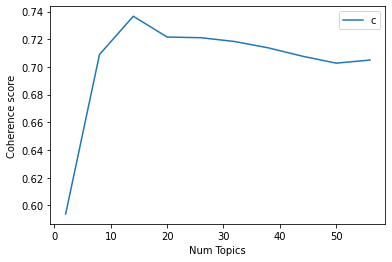

In [ ]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=num_topics, id2word=id2word)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=after_lemmatization, start=2, limit=60, step=6)
limit=60; start=2; step=6;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [ ]:
for no_of_topics, cv in zip(range(2, 60, 6), coherence_values):
  print("Num Topics:", no_of_topics, " - Coherence Value:", round(cv, 4))

Num Topics: 2  - Coherence Value: 0.5938
Num Topics: 8  - Coherence Value: 0.709
Num Topics: 14  - Coherence Value: 0.7367
Num Topics: 20  - Coherence Value: 0.7216
Num Topics: 26  - Coherence Value: 0.7211
Num Topics: 32  - Coherence Value: 0.7184
Num Topics: 38  - Coherence Value: 0.7138
Num Topics: 44  - Coherence Value: 0.7078
Num Topics: 50  - Coherence Value: 0.7028
Num Topics: 56  - Coherence Value: 0.705


## (2) (8 points) Generate K topics by using LSA, the number of topics K should be decided by the coherence score, then summarize what are the topics. You may refer the code here:

https://www.datacamp.com/community/tutorials/discovering-hidden-topics-python

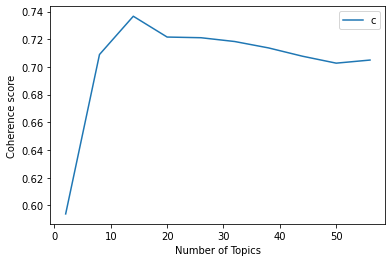

In [ ]:
from gensim.models import LsiModel
lsamodel = LsiModel(corpus, 20, id2word)
def compute_coherence_values_lsi(dictionary, doc_term_matrix, doc_clean, stop, start=2, step=3):
    coherence_values = []
    model_list = []
    for num_topics in range(start, stop, step):
        model = LsiModel(doc_term_matrix, num_topics=20, id2word = dictionary)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=doc_clean, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
    return model_list, coherence_values
start,stop,step=2,60,6
model_list_lsa, coherence_values_lsa = compute_coherence_values_lsi(id2word, corpus,after_lemmatization,stop, start, step)
x = range(start, stop, step)
plt.plot(x, coherence_values)
plt.xlabel("Number of Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [ ]:
for no_of_topics, cv in zip(range(2, 60, 6), coherence_values_lsa):
  print("Num Topics:", no_of_topics, " - Coherence Value:", round(cv, 4))

Num Topics: 2  - Coherence Value: 0.4425
Num Topics: 8  - Coherence Value: 0.4255
Num Topics: 14  - Coherence Value: 0.4335
Num Topics: 20  - Coherence Value: 0.4505
Num Topics: 26  - Coherence Value: 0.4255
Num Topics: 32  - Coherence Value: 0.4335
Num Topics: 38  - Coherence Value: 0.4255
Num Topics: 44  - Coherence Value: 0.4505
Num Topics: 50  - Coherence Value: 0.4335
Num Topics: 56  - Coherence Value: 0.4335


**Printing Topics**

## (3) (4 points) Compare the results generated by the two topic modeling algorithms, which one is better? You should explain the reasons in details.

The accuracy of Latent Semantic Analysis is lower than that of The precision of latent Dirichlet allocation is higher.In this case, the optimal number of subjects for LSA is 45, while for LDA it is 73.
We also learn that LDA accuracy is higher as a result of this.Because the LDA model is more accurate, we can easily apply it to new documents.
Because of the dimensionality reduction, LSA has less interpretability among the subjects, while we can easily interpret topics in LDA.